## Hello everybody 😃 😃 welcome back


In [1]:
import os
import cv2 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Image Size
IMG_ROWS, IMG_COLS = 100, 100 # input image dimensions
NB_CLASSES =  3 # number of outputs = number of digits

## (01)   ACQUISITION DES DONNEES - IMAGES DES FEUILLES DES PLANTES. 

In [2]:
########################################### function for plotting images

def plot_images(images, total_images=100, rows=20, cols=5, fsize=(20,100), titre='Image'):
    
    fig = plt.figure(figsize=fsize) # create a new figure window
    
    for i in range(total_images): # display images
        # subplot : 33 rows and 5 columns
        img_grid = fig.add_subplot(rows, cols, i+1)
        # plot features as image
        img_grid.imshow(images[i])
        
        plt.title(titre)


In [3]:
############################################ function for resizng images
       
def preprocess_image(image, image_height=IMG_ROWS, image_width=IMG_COLS):

    return cv2.resize(image, (image_height, image_width))

############################################ function for reading images 
       
def read_images (path , sz= None ):
    
    print('\nCHARGEMENT DES IMAGES DE LA BASE .......................!\n') 

    X,y = [], []
    
    for dirname , dirnames , filenames in os.walk(path):
        
        c = 0
        
        for subdirname in dirnames :
            
            subject_path = os. path . join ( dirname , subdirname )
            
            for filename in os. listdir ( subject_path ):
                
                im = Image.open(os.path.join(subject_path, filename))
                #im = im.convert ("L")

                if (sz is not None ):
                    im = im.resize (sz , Image.ANTIALIAS ) 
                    
                im = np.array(im)
                im = preprocess_image(im, IMG_ROWS, IMG_COLS)
                X.append(im)
                y.append (c)  
                
            c = c+1
            
    return [X,y]




LECTURE DES IMAGES DE LA BASE D'APPRENTISSAGE........!

CHARGEMENT DES IMAGES DE LA BASE .......................!




AFFICHAGE DE QUELQUES IMAGES DE LA BASE.................!


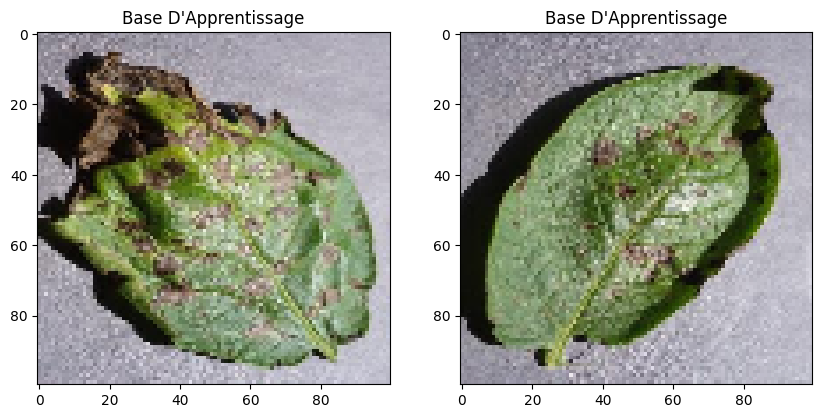


FIN D'AFFICHAGE DES IMAGES DE LA BASE...................!



In [4]:
############################################ Read And Resize test images

print('\n\nLECTURE DES IMAGES DE LA BASE D\'APPRENTISSAGE........!') 

[X_train, y_train] = read_images("C:/Users/Dell 7280/Documents/Etude/ESCEP/S3/Deep learning/TP/TP_03/Data/Potato/TrainData") # Potato

print('\nAFFICHAGE DE QUELQUES IMAGES DE LA BASE.................!')
plot_images(X_train, 2, 1, 2,(10, 50), titre='Base D\'Apprentissage')
plt.show()
print('\nFIN D\'AFFICHAGE DES IMAGES DE LA BASE...................!\n')

In [5]:
############################################################# Train Data

images_train = X_train
images_train = np.asarray(images_train)

# Train targets
train_features = images_train
train_targets = y_train

from keras.utils import to_categorical
# convert class vectors to binary class matrices
train_targets = to_categorical(train_targets, NB_CLASSES)

print('\nNORMALISATION DES BASES DE TEST ET D\'APPRENTISSAGE.\n')

########################################################## Normalisation

train_features = train_features.astype('float32')

mean_vals = np.mean(train_features, axis=0)
std_val = np.std(train_features)
train_features = (train_features - mean_vals)/std_val

train_features = train_features.reshape(train_features.shape[0], IMG_ROWS, IMG_COLS, 3)
print("train_features.shape     >==============<> : {}".format(train_features.shape))
print("train_targets.shape      >==============<> : {}".format(train_targets.shape))


NORMALISATION DES BASES DE TEST ET D'APPRENTISSAGE.

train_features.shape     >==============<> : (1722, 100, 100, 3)
train_targets.shape      >==============<> : (1722, 3)


In [6]:
########################################################################
#(02)        CLASSIFICATION : CREATION DU MODELE DE PREDICTION         #
########################################################################

In [7]:
from keras import optimizers
from time import time
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense

In [8]:
######################################################## Build The Model

class LeNet:
    
	@staticmethod
	def build(input_shape, classes):
        
		model = Sequential()
        
        # Add the first convolution layer
		# CONV => TANH => POOL
		model.add(Conv2D(filters = 6, kernel_size=(5,5) , strides=(1, 1), padding="same", input_shape=input_shape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

        # Add the second convolution layer
        # CONV => TANH => POOL
		model.add(Conv2D(filters = 16, kernel_size=(5,5) , strides=(1, 1), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

        # Add the third convolution layer
        # CONV => TANH => POOL
		model.add(Conv2D(filters = 256, kernel_size=(5,5) , strides=(1, 1), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

        # Flatten => TANH => layers
        # Flatten the network
        # Add a fully-connected hidden layer
        # Add a tanh activation function
		model.add(Flatten())
		model.add(Dense(256))
		model.add(Activation("relu"))
 
        # Add a fully-connected output layer
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model

In [9]:
########################################################## Use The Model

OPTIMIZER=optimizers.Adam()
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 3)
NB_EPOCH = 1
BATCH_SIZE = 64
VERBOSE = 1

# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

t_start = time()
history = model.fit(train_features, train_targets, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE)
time_full_train = time() - t_start

print("\nTEMPS D\'APPRENTISSAGE DU CLASSIFIEUR >====<> : %0.2fs " % (time_full_train))
model.save("lenet_groupe_2.h5")
print('\nENREGISTRER LE MODELE .\n')

c:\Users\Dell 7280\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100, 100, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 50, 50, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,560,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,563,899 (9.78 MB)

 Trainable params: 2,563,899 (9.78 MB)

 Non-trainable params: 0 (0.00 B)

27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 325ms/step - accuracy: 0.5921 - loss: 2.1768



TEMPS D'APPRENTISSAGE DU CLASSIFIEUR >====<> : 15.02s 

ENREGISTRER LE MODELE .



Membre du groupe N°2:


ISSA IBRAHIM Moubarak

Abdourahamen bachir